In [44]:
import pandas as pd
from analysis import data_consumption_comparison
import os.path as osp
from matplotlib import pyplot as plt
import csv

known_data_path = osp.join(osp.dirname(data_consumption_comparison.__file__), "known_consumption_performance.csv")
df_known = pd.read_csv(known_data_path)

pred_data_path = osp.join(osp.dirname(data_consumption_comparison.__file__), "pred_consumption_performance.csv")
df_pred = pd.read_csv(pred_data_path)

pred_data_path = osp.join(osp.dirname(data_consumption_comparison.__file__), "pred_consumption_predictions.csv")
df_predictions = pd.read_csv(pred_data_path)

In [45]:
df_pred = pd.concat([df_pred, df_predictions], axis=1)

In [46]:
col_names = ["agent_id",
            "action",
            "electrical_storage_soc",
            "net_electricity_consumption",
            "non_shiftable_load",
            "solar_generation",
            "carbon_intensity",
            "electricity_pricing"]
df_known.columns = col_names
pred_col_names = col_names + ["predicted_load", "predicted_solar"]
df_pred.columns = pred_col_names
df_pred.head()

,agent_id,action,electrical_storage_soc,net_electricity_consumption,non_shiftable_load,solar_generation,carbon_intensity,electricity_pricing,predicted_load,predicted_solar
0,1,-0.290676,0.240058,-0.428789,9.918213e-08,0.0,0.175584,0.22,1.852246,-0.008032
1,2,0.010877,0.240058,-0.428789,9.918213e-08,0.0,0.175584,0.22,-0.079087,-0.009476
2,3,-0.419005,0.240058,1.503286,1.932075e+00,0.0,0.175584,0.22,2.671725,-0.009840
3,4,-0.143666,0.240058,-0.138706,2.900833e-01,0.0,0.175584,0.22,0.914893,-0.004545
4,0,0.048045,0.401220,1.965465,8.333500e-01,0.0,0.170252,0.22,-0.311704,-0.004221


In [52]:
building_num_known = 0
building_num_pred = 0
df_known_building = df_known.loc[df_known["agent_id"] == building_num_known]
df_pred_building = df_pred.loc[df_pred["agent_id"] == building_num_pred]

In [53]:
exclude_columns = ["predicted_solar", "electrical_storage_soc", "agent_id", "carbon_intensity", "electricity_pricing"]
df_known_building = df_known_building[[x for x in col_names if x not in exclude_columns]]
df_pred_building = df_pred_building[[x for x in pred_col_names if x not in exclude_columns]]

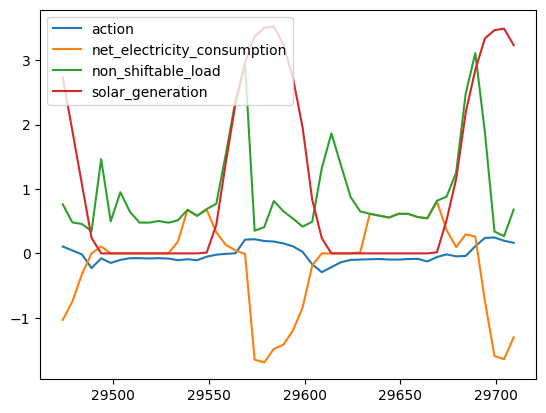

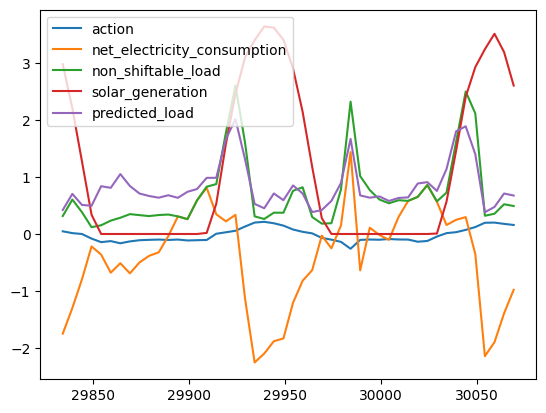

In [67]:
left_bound = 5894
window_width = 48
right_bound = left_bound + window_width

df_known_building[left_bound:right_bound].plot(kind='line')
plt.legend(loc='upper left')
plt.show()

shift = 72
df_pred_building[left_bound + shift:right_bound + shift].plot(kind='line')
plt.legend(loc='upper left')
plt.show()